## Aufgabe

Im folgenden sind unterschiedliche Anordnungen von Daten in niedrigdimensionalen Merkmalsräumen zufällig erzuegt wurden. Verwenden Sie K-Means, um diese Daten zu clustern. Visualisieren Sie die Auswirkung unterschiedler Anzahl Centroids auf das Ergebnis.

In [2]:
import numpy as np
from sklearn import datasets

In [3]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

listofdata = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_test = noisy_circles[0]
Y_test = noisy_circles[1]

print(X_test)
print(Y_test)

scaler = StandardScaler()
scaler.fit(X_test,Y_test)

Y_test = Y_test.reshape(-1,1)

model = KMeans(n_clusters = 3)
model.fit(X_test)

labels = model.labels_
centers = model.cluster_centers_

centers_transformed = scaler.inverse_transform(centers)

[[-0.98309805 -0.27396456]
 [ 0.1253079   0.45614614]
 [-0.10158023  0.46780635]
 ...
 [-0.46510635  0.20854728]
 [ 0.00103896  0.96682193]
 [ 0.24673615  0.96545784]]
[0 1 1 ... 1 0 0]


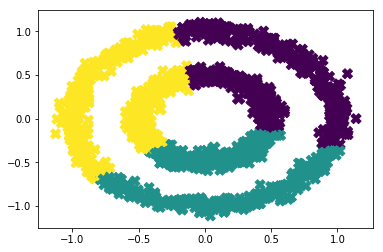

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:,0],X_test[:,1],c=labels,marker='X',s=100)
plt.scatter(centers_transformed[:,0],centers_transformed[:,1],c=range(len(centers_transformed)),marker = 'X',s=150)

[[-0.98309805 -0.27396456]
 [ 0.1253079   0.45614614]
 [-0.10158023  0.46780635]
 ...
 [-0.46510635  0.20854728]
 [ 0.00103896  0.96682193]
 [ 0.24673615  0.96545784]]
[0 1 1 ... 1 0 0]


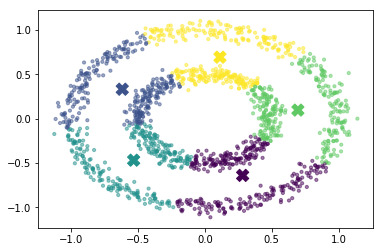

[[ 1.14416655 -0.51488703]
 [ 0.08564559  0.40115062]
 [ 0.54458272 -0.37988464]
 ...
 [-0.57511209  0.77210347]
 [-0.00897729  0.23697614]
 [-0.86764935  0.62327402]]
[1 1 1 ... 0 1 0]


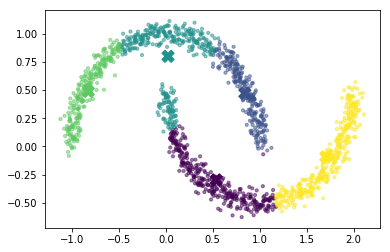

[[ -6.11119721   1.47153062]
 [ -7.49665361   0.9134251 ]
 [-10.84489837  -7.55352273]
 ...
 [  1.64990343  -0.20117787]
 [  0.79230661   0.60868888]
 [  1.91226342   0.25327399]]
[1 1 0 ... 2 2 2]


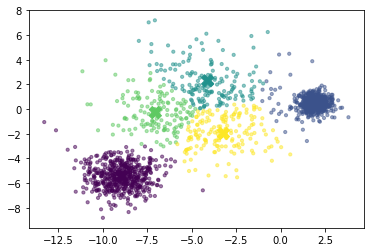

[[-3.37561542  3.63236314]
 [-3.61882807  3.78627892]
 [-3.48552993  0.46412084]
 ...
 [ 1.17962827 -1.54262502]
 [-0.49738132  0.78227797]
 [ 1.13089877 -1.13033403]]
[1 1 0 ... 2 2 2]


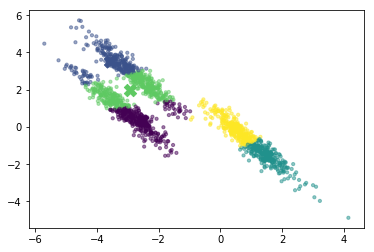

[[ 5.86749807  8.17715188]
 [ 5.61369982  9.93295527]
 [ 7.22508428 10.44886194]
 ...
 [ 7.73674097 10.82855388]
 [-4.61701094 -9.64855983]
 [-3.48640175 -9.25766922]]
[0 0 0 ... 0 2 2]


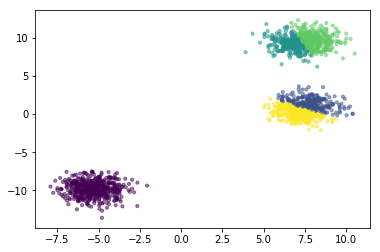

[[0.61956091 0.74166601]
 [0.00231529 0.21541042]
 [0.66814766 0.52181916]
 ...
 [0.32856102 0.48941931]
 [0.97066347 0.47667252]
 [0.21733497 0.55948466]]
None


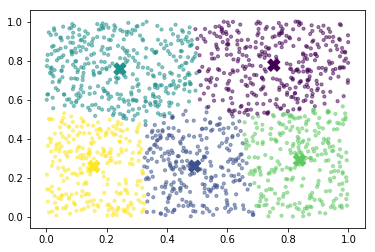

In [37]:
for i in listofdata:
    
    X_test = i[0]
    Y_test = i[1]

    print(X_test)
    print(Y_test)

    scaler = StandardScaler()
    scaler.fit(X_test,Y_test)

    #Y_test = Y_test.reshape(-1,1)

    model = KMeans(n_clusters = 5)
    model.fit(X_test)

    labels = model.labels_
    centers = model.cluster_centers_

    centers_transformed = scaler.inverse_transform(centers)
    plt.scatter(X_test[:,0],X_test[:,1],c=labels,alpha=0.5,s=10)
    plt.scatter(centers[:,0],centers[:,1],c=range(len(centers)),marker = 'X',s=150)
    plt.show()